In [15]:
import pandas as pd
import numpy as np
import statistics

# Assuming your dataframe is named df
df = pd.read_csv("/home/soham37/Downloads/xCOMET/xCOMET/bleu_scores.csv")
# Split the dataframe into 6 chunks of 16 rows each
chunks = np.array_split(df, 6)

/home/soham37/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [30]:
chunks

[                          file  bleu_scores
 0              education_Aya23        36.40
 1         education_Claude_3_5        46.04
 2      education_CommandR_plus        35.33
 3             education_CycleL         0.38
 4              education_GPT_4        40.90
 5               education_IKUN        28.99
 6             education_IKUN_C        28.62
 7       education_IOL_Research        40.47
 8         education_Llama3_70B        40.73
 9        education_NVIDIA_NeMo        45.12
 10          education_ONLINE_A        50.27
 11          education_ONLINE_B        46.19
 12          education_ONLINE_G        46.19
 13       education_TranssionMT        46.70
 14  education_Unbabel_Tower70B        44.22
 15               education_ZMT        50.27,
                         file  bleu_scores
 16             general_Aya23        14.13
 17        general_Claude_3_5        19.02
 18     general_CommandR_plus        14.39
 19            general_CycleL         1.21
 20             gen

In [42]:
result = [(a + b + c + d + e + f)/6 for a, b, c, d, e, f in zip(chunks[0]["bleu_scores"], chunks[1]["bleu_scores"], chunks[2]["bleu_scores"], chunks[3]["bleu_scores"], chunks[4]["bleu_scores"], chunks[5]["bleu_scores"])]

In [49]:
res = [round(i, 2) for i in  result]

In [52]:
file = ["Aya23", "Claude_3_5", "CommandR_plus", "CycleL", "GPT_4", "IKUN", "IKUN_C", "IOL_Research", "Llama3_70B", "NVIDIA_NeMo", "ONLINE_A", "ONLINE_B", "ONLINE_G", "TranssionMT", "Unbabel_Tower70B", "ZMT"]

In [50]:
res

[23.09,
 30.79,
 22.59,
 0.62,
 25.18,
 15.46,
 14.62,
 25.81,
 25.83,
 29.91,
 35.8,
 35.34,
 33.0,
 35.48,
 30.51,
 35.8]

In [54]:
final_model = pd.DataFrame({"file": file, "bleu_scores": res})

In [34]:
from functools import reduce

In [38]:
chunks[0]

,file,bleu_scores
0,education_Aya23,36.40
1,education_Claude_3_5,46.04
2,education_CommandR_plus,35.33
3,education_CycleL,0.38
4,education_GPT_4,40.90
5,education_IKUN,28.99
6,education_IKUN_C,28.62
7,education_IOL_Research,40.47
8,education_Llama3_70B,40.73
9,education_NVIDIA_NeMo,45.12


In [36]:
final_df = pd.merge(chunks[0], chunks[1], on = "file")

In [37]:
final_df

,file,bleu_scores_x,bleu_scores_y


In [33]:
type(chunks)

list

In [35]:
# Merge all dataframes on "names"
final_df = reduce(lambda left, right: pd.merge(left, right, on="file"), chunks)

MergeError: Passing 'suffixes' which cause duplicate columns {'bleu_scores_x'} is not allowed.

In [55]:
final_model

,file,bleu_scores
0,Aya23,23.09
1,Claude_3_5,30.79
2,CommandR_plus,22.59
3,CycleL,0.62
4,GPT_4,25.18
5,IKUN,15.46
6,IKUN_C,14.62
7,IOL_Research,25.81
8,Llama3_70B,25.83
9,NVIDIA_NeMo,29.91


In [56]:
import matplotlib.pyplot as plt

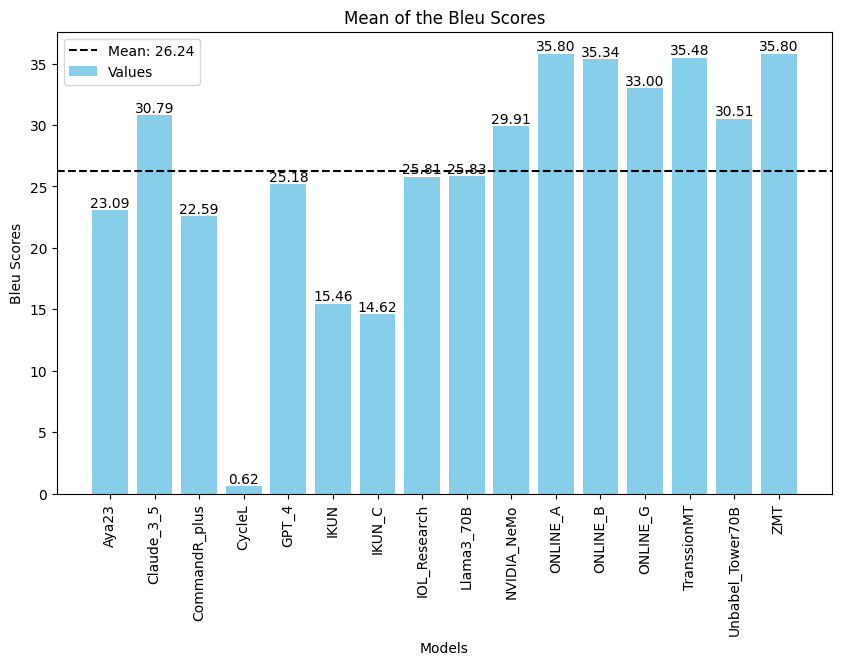

In [71]:
# Calculate the mean of the values
mean_value = final_model['bleu_scores'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
# plt.bar(final_model['file'], final_model['bleu_scores'], color='skyblue', label='Values')

bars = plt.bar(final_model['file'], final_model['bleu_scores'], color='skyblue', label='Values')

# Add a line for the mean value
plt.axhline(y=mean_value, color='black', linestyle='--', label=f'Mean: {mean_value:.2f}')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Bleu Scores')
plt.title('Mean of the Bleu Scores')
plt.legend()

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)



# # Save the plot to a file
# plt.savefig('bar_graph_with_mean_line.png', bbox_inches='tight')
# Display the value on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom')
    
# Show the plot
plt.show()

## Full Bleu

In [81]:
from sacrebleu.metrics import BLEU

In [73]:
import os

In [79]:
base_folder = "/home/soham37/Downloads/xCOMET/xCOMET/Domains/full"

In [88]:
with open("/home/soham37/Downloads/xCOMET/xCOMET/Domains/full/full_reference.txt", "r") as f:
    references = f.readlines()    

In [103]:
ls_full_bleu_score = []

In [101]:
for model in file:
    with open(f"/home/soham37/Downloads/xCOMET/xCOMET/Domains/full/full_{model}.txt", "r") as h:
        hypothesis = h.readlines()
    print(model)

Aya23
Claude_3_5
CommandR_plus
CycleL
GPT_4
IKUN
IKUN_C
IOL_Research
Llama3_70B
NVIDIA_NeMo
ONLINE_A
ONLINE_B
ONLINE_G
TranssionMT
Unbabel_Tower70B
ZMT


In [104]:
for model in file: 
    with open(f"/home/soham37/Downloads/xCOMET/xCOMET/Domains/full/full_{model}.txt", "r") as h:
        hypothesis = h.readlines()
    bleu = BLEU()
    score = bleu.corpus_score(hypotheses=hypothesis, references=[references])
    bleu_score = float(str(score).split()[2])
    ls_full_bleu_score.append(bleu_score)
    # print(model)


In [105]:
ls_full_bleu_score

[23.53,
 31.63,
 23.28,
 0.78,
 25.98,
 16.7,
 16.44,
 26.79,
 26.18,
 29.81,
 36.21,
 35.92,
 32.79,
 35.94,
 31.3,
 36.2]

In [106]:
df_full = pd.DataFrame({"file": file, "full_bleu": ls_full_bleu_score})

In [107]:
df_full

,file,full_bleu
0,Aya23,23.53
1,Claude_3_5,31.63
2,CommandR_plus,23.28
3,CycleL,0.78
4,GPT_4,25.98
5,IKUN,16.70
6,IKUN_C,16.44
7,IOL_Research,26.79
8,Llama3_70B,26.18
9,NVIDIA_NeMo,29.81


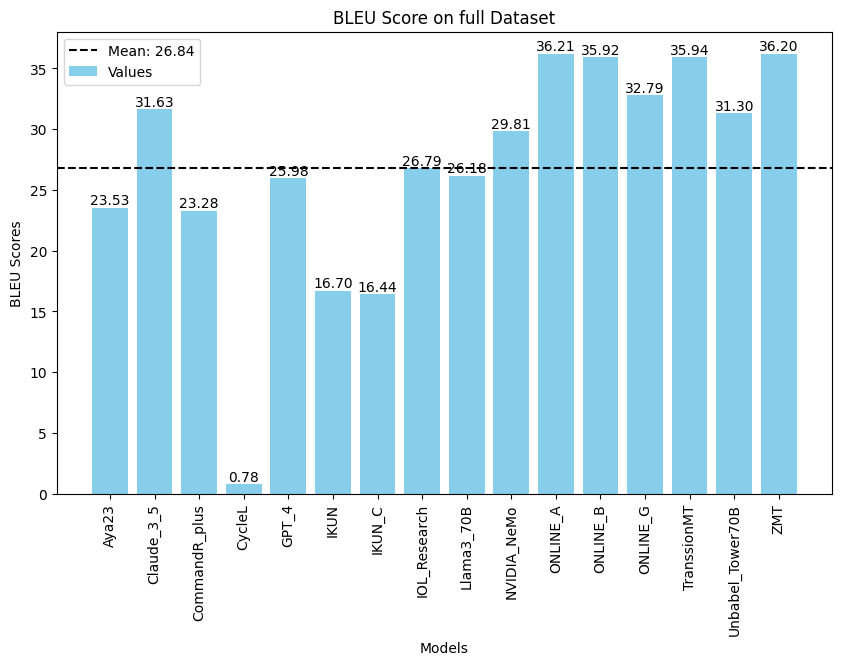

In [109]:
# Calculate the mean of the values
mean_value = df_full['full_bleu'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
# plt.bar(final_model['file'], final_model['bleu_scores'], color='skyblue', label='Values')

bars = plt.bar(df_full['file'], df_full['full_bleu'], color='skyblue', label='Values')

# Add a line for the mean value
plt.axhline(y=mean_value, color='black', linestyle='--', label=f'Mean: {mean_value:.2f}')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('BLEU Scores')
plt.title('BLEU Score on full Dataset')
plt.legend()

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)



# # Save the plot to a file
# plt.savefig('bar_graph_with_mean_line.png', bbox_inches='tight')
# Display the value on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom')
    
# Show the plot
plt.show()